In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use("/data/c/yangyusheng_optimized/DIT_HAP_pipeline/config/DIT_HAP.mplstyle")
mpl.rcParams['xtick.alignment'] = "center"
mpl.rcParams['ytick.alignment'] = "center"
mito_ribo_genes = pd.read_excel("/data/c/yangyusheng_optimized/DIT_HAP_pipeline/results/HD_DIT_HAP/21_similarity_analysis_for_terms/mito_ribo_genes.xlsx")

In [36]:
gene_features = pd.read_csv("/data/c/yangyusheng_optimized/DIT_HAP_pipeline/resources/pombase_data/collected_pombe_gene_features.csv", na_values=["none"])

In [9]:
mito_ribo_genes_with_gene_features = pd.merge(mito_ribo_genes, gene_features, left_on="Systematic ID", right_on="Systematic_ID", how="inner")

In [45]:
mito_cluster1_genes = mito_ribo_genes_with_gene_features.query("um > 0.5 and um < 0.75")["Systematic ID"].tolist()
mito_cluster2_genes = mito_ribo_genes_with_gene_features.query("um > 0.75")["Systematic ID"].tolist()
mito_cluster3_genes = mito_ribo_genes_with_gene_features.query("um < 0.5")["Systematic ID"].tolist()

In [46]:
mito_ribo_genes_with_gene_features.loc[mito_ribo_genes_with_gene_features["Systematic ID"].isin(mito_cluster1_genes), "mito_cluster"] = "0.5<um<0.75"
mito_ribo_genes_with_gene_features.loc[mito_ribo_genes_with_gene_features["Systematic ID"].isin(mito_cluster2_genes), "mito_cluster"] = "um>0.75"
mito_ribo_genes_with_gene_features.loc[mito_ribo_genes_with_gene_features["Systematic ID"].isin(mito_cluster3_genes), "mito_cluster"] = "um<0.5"

In [47]:
import altair as alt
import seaborn as sns

/data/a/yangyusheng/miniforge3/envs/bioinformatics/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 8.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/data/a/yangyusheng/miniforge3/envs/bioinformatics/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 13.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


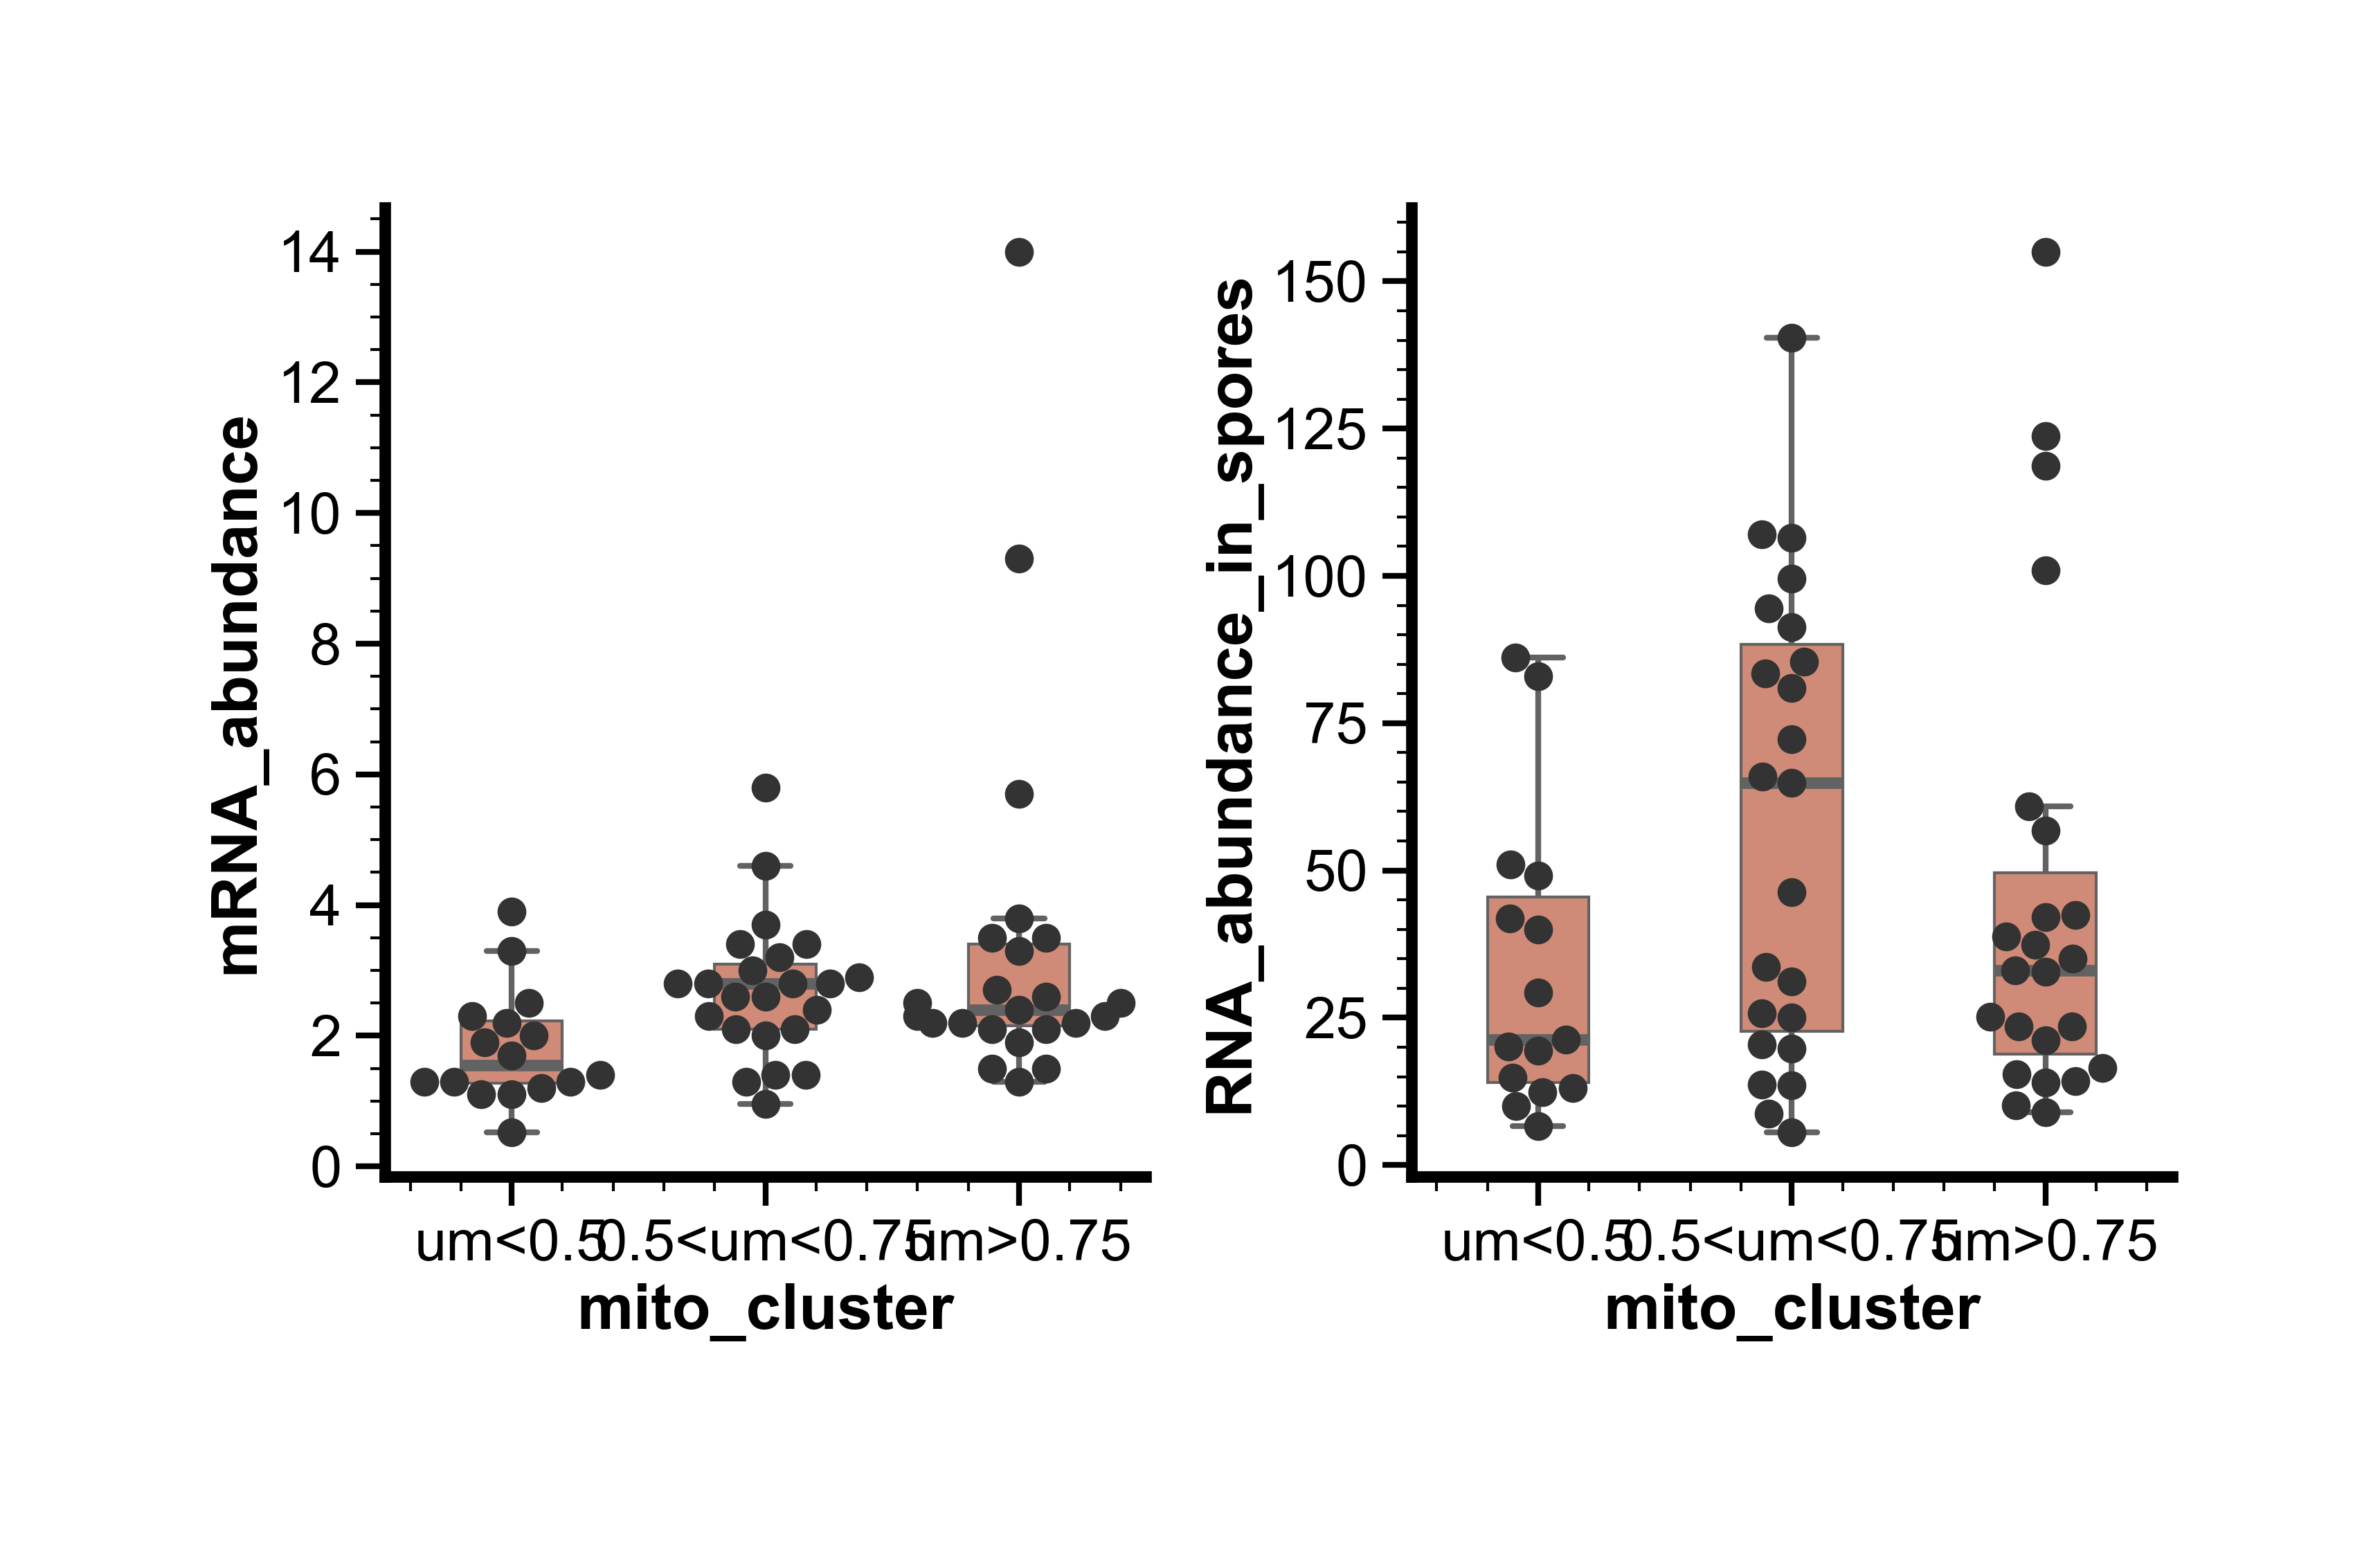

In [50]:

fig, ax = plt.subplots(1, 2, figsize=(10, 6))

sns.boxplot(data=mito_ribo_genes_with_gene_features, x="mito_cluster", y="mRNA_abundance", showfliers=False, ax=ax[0], width=0.4, order=["um<0.5", "0.5<um<0.75", "um>0.75"])
sns.swarmplot(data=mito_ribo_genes_with_gene_features, x="mito_cluster", y="mRNA_abundance", color=".2", ax=ax[0], size=10, order=["um<0.5", "0.5<um<0.75", "um>0.75"])

sns.boxplot(data=mito_ribo_genes_with_gene_features, x="mito_cluster", y="RNA_abundance_in_spores", showfliers=False, ax=ax[1], width=0.4, order=["um<0.5", "0.5<um<0.75", "um>0.75"])
sns.swarmplot(data=mito_ribo_genes_with_gene_features, x="mito_cluster", y="RNA_abundance_in_spores", color=".2", ax=ax[1], size=10, order=["um<0.5", "0.5<um<0.75", "um>0.75"])

plt.tight_layout()
plt.show()
plt.close()
